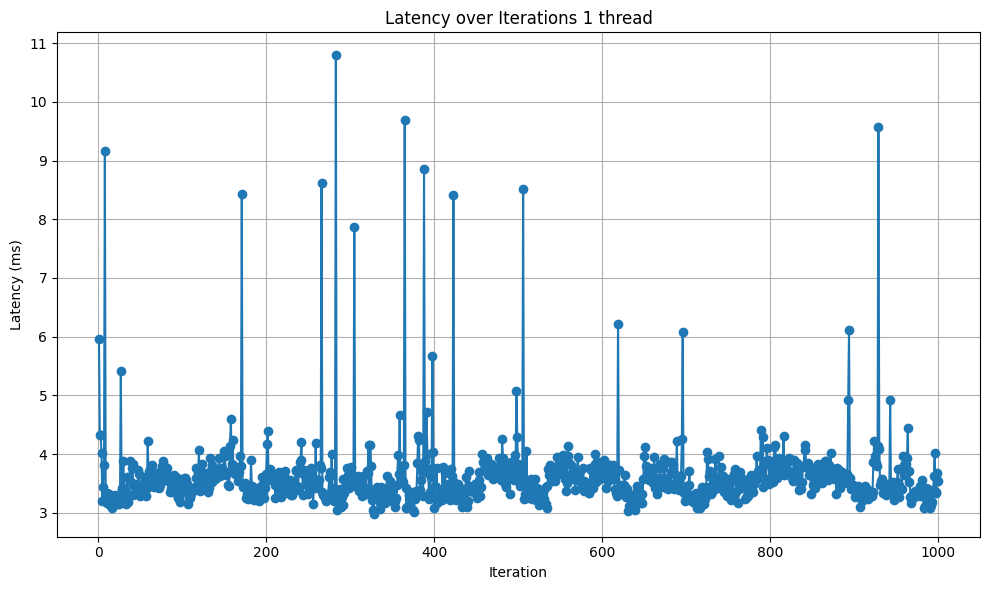

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file (semicolon-separated)
df = pd.read_csv("result.thread1.csv", sep=';', engine='python')

# Clean column names
df.columns = [col.strip() for col in df.columns]

# Plot latency_ms over iterations
plt.figure(figsize=(10, 6))
plt.plot(df['iteration'], df['latency_ms'], marker='o', linestyle='-')
plt.title('Latency over Iterations 1 thread')
plt.xlabel('Iteration')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.tight_layout()
plt.show()


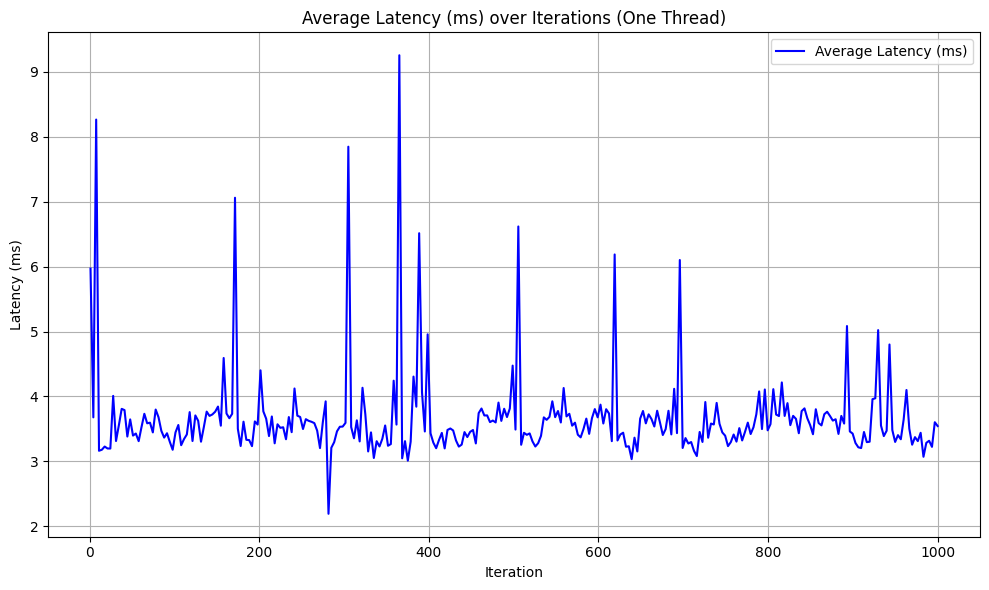

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# List to store dataframes
dfs = []

# Load all threads data

filename = f"result.thread1.csv"
df = pd.read_csv(filename, sep=';', engine='python')
df.columns = [col.strip() for col in df.columns]
dfs.append(df[['iteration', 'latency_ms']])

# Concatenate all data
all_data = pd.concat(dfs)

# Compute average latency_ms for each iteration
avg_latency = all_data.groupby('iteration')['latency_ms'].mean().reset_index()

x = avg_latency['iteration'].values
y = avg_latency['latency_ms'].values

# Smooth curve points
x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, y, k=3)
y_smooth = spline(x_smooth)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='blue', label='Average Latency (ms)')
plt.title('Average Latency (ms) over Iterations (One Thread)')
plt.xlabel('Iteration')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
